# Exercises for Chapter 3: Classification

### 1) Build a classifier for the MNIST dataset that predicts at 97% accuracy
Just in the interest of time, I won't be too focused on achieving 97% accuracy. I want to keep moving on to other parts in the book. I know what I would do and I'm just practicing the basics of what would be done.

In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

In [2]:
mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']
X = X.astype(np.float64)

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

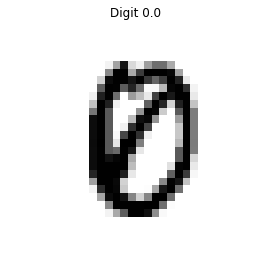

In [4]:
idx = 501

digit = X[idx].reshape(28, 28)
plt.imshow(digit, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.title("Digit {}".format(y[idx]))
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52500, 784), (17500, 784), (52500,), (17500,))

In [6]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('decom', PCA(n_components=64)),
    ('model', KNeighborsClassifier(n_jobs=-1))
])

rand_dists = {
    'model__n_neighbors': randint(3, 10),
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['ball_tree', 'kd_tree', 'brute']
}

rand_grid = RandomizedSearchCV(pipe, param_distributions=rand_dists, verbose=2, n_iter=5, cv=2)

In [7]:
rand_grid.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] model__algorithm=kd_tree, model__n_neighbors=5, model__weights=uniform 
[CV]  model__algorithm=kd_tree, model__n_neighbors=5, model__weights=uniform, total= 1.5min
[CV] model__algorithm=kd_tree, model__n_neighbors=5, model__weights=uniform 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV]  model__algorithm=kd_tree, model__n_neighbors=5, model__weights=uniform, total= 1.7min
[CV] model__algorithm=kd_tree, model__n_neighbors=8, model__weights=distance 
[CV]  model__algorithm=kd_tree, model__n_neighbors=8, model__weights=distance, total= 1.5min
[CV] model__algorithm=kd_tree, model__n_neighbors=8, model__weights=distance 
[CV]  model__algorithm=kd_tree, model__n_neighbors=8, model__weights=distance, total= 1.7min
[CV] model__algorithm=kd_tree, model__n_neighbors=6, model__weights=distance 
[CV]  model__algorithm=kd_tree, model__n_neighbors=6, model__weights=distance, total= 1.7min
[CV] model__algorithm=kd_tree, model__n_neighbors=6, model__weights=distance 
[CV]  model__algorithm=kd_tree, model__n_neighbors=6, model__weights=distance, total= 1.6min
[CV] model__algorithm=brute, model__n_neighbors=4, model__weights=distance 
[CV]  model__algorithm=brute, model__n_neighbors=4, model__weights=distance, total=  19.4s
[CV] model__algorithm=brute, model__n_neighbors=4, model_

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 27.1min finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decom', PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'model__n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002006E84F550>, 'model__weights': ['uniform', 'distance'], 'model__algorithm': ['ball_tree', 'kd_tree', 'brute']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [9]:
est = rand_grid.best_estimator_
est

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decom', PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance'))])

In [10]:
est.score(X_train, y_train)

1.0

In [11]:
est.score(X_test, y_test)

0.9613714285714285

In [13]:
from sklearn.externals import joblib
joblib.dump(est, r'..\saved_models\03_knn_best_est.joblib')

['..\\saved_models\\03_knn_best_est.joblib']

## 2) Write a function that shifts the MNIST image in each cardinal direction. Then add a shifted image for each image to the training set.

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.shift.html#scipy.ndimage.shift

def im_shift_one(arr, direction):
    dir_map = {'up': [0, 1], 'down': [0, -1], 'left': [-1, 0], 'right': [1, 0]}
    